Understanding Dataset

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv("ratings.csv")
df_tags = pd.read_csv("tags.csv")
df_links = pd.read_csv("links.csv")
# Get the shape of the DataFrame
movies_shape = df_movies.shape
ratings_shape = df_ratings.shape
tags_shape = df_tags.shape
links_shape = df_links.shape

# Print the shape of the DataFrame
print(movies_shape)
print(ratings_shape)
print(tags_shape)
print(links_shape)

(9742, 3)
(43084, 4)
(3683, 4)
(9742, 3)


In [3]:
unique_ids = df_ratings['userId'].nunique()
print(unique_ids)


288


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
merged_df = pd.merge(df_ratings, df_movies, on='movieId')

# Group by 'title' and count the number of ratings for each movie
ratings_count = merged_df.groupby('title')['rating'].count()

# Find the movie with the maximum number of ratings
max_rated_movie = ratings_count.idxmax()

print(f"The movie that has received the maximum number of user ratings is: {max_rated_movie}")

The movie that has received the maximum number of user ratings is: Forrest Gump (1994)


In [8]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = df_movies[df_movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags for "Matrix, The (1999)"
matrix_tags = df_tags[df_tags['movieId'] == matrix_movie_id]

# Display the tags for the specified movie
correct_tags = matrix_tags['tag'].unique()
print(f"The correct tags for 'Matrix, The (1999)' are: {', '.join(correct_tags)}")


The correct tags for 'Matrix, The (1999)' are: martial arts, sci-fi, alternate universe, philosophy, post apocalyptic


In [10]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie_id = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter ratings for "Terminator 2: Judgment Day (1991)"
terminator2_ratings = df_ratings[df_ratings['movieId'] == terminator2_movie_id]

# Calculate the average user rating
average_rating = terminator2_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 4.04


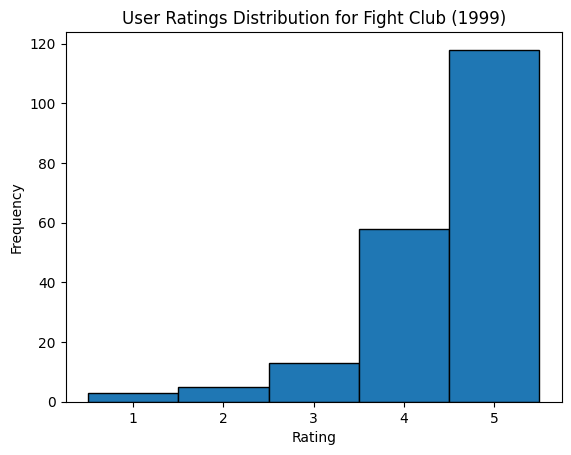

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the movies and ratings datasets
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = df_movies[df_movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = df_ratings[df_ratings['movieId'] == fight_club_movie_id]

# Plot a histogram to visualize the data distribution
plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.show()


In [12]:
# Group user ratings based on movieId and apply aggregation operations
grouped_ratings = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
grouped_ratings.columns = ['rating_count', 'rating_mean']

# Inner join with movies dataframe
merged_df = pd.merge(df_movies, grouped_ratings, on='movieId', how='inner')

# Filter only those movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the resulting dataframe
print(filtered_df.head(30))

     movieId                                      title  \
0          1                           Toy Story (1995)   
1          2                             Jumanji (1995)   
5          6                                Heat (1995)   
9         10                           GoldenEye (1995)   
10        11             American President, The (1995)   
15        16                              Casino (1995)   
16        17               Sense and Sensibility (1995)   
18        19      Ace Ventura: When Nature Calls (1995)   
20        21                          Get Shorty (1995)   
24        25                   Leaving Las Vegas (1995)   
31        32  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
32        34                                Babe (1995)   
33        36                    Dead Man Walking (1995)   
35        39                            Clueless (1995)   
43        47                Seven (a.k.a. Se7en) (1995)   
44        48                          Pocahontas (1995) 

In [13]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']} with an average rating of {most_popular_movie['rating_mean']:.2f}")


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994) with an average rating of 4.42


In [14]:
# Find the top 5 popular movies based on number of user ratings
top_5_popular_movies = filtered_df.nlargest(5, 'rating_count')

# Display the titles of the top 5 popular movies
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies['title'])


Top 5 popular movies based on number of user ratings:
299                  Forrest Gump (1994)
263     Shawshank Redemption, The (1994)
245                  Pulp Fiction (1994)
1853                  Matrix, The (1999)
486     Silence of the Lambs, The (1991)
Name: title, dtype: object


In [15]:
# Filter Sci-Fi movies from the filtered dataframe
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Find the third most popular Sci-Fi movie based on number of user ratings
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[-1]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi['title']} with {third_most_popular_sci_fi['rating_count']} user ratings.")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993) with 211 user ratings.


In [ ]:
# Find the movieId with the highest IMDB rating
highest_rated_movie = df_links.loc[df_links['imdb_rating'].idxmax()]

print(f"The movieId of the movie with the highest IMDB rating is: {highest_rated_movie['movieId']} with an IMDB rating of {highest_rated_movie['imdb_rating']}")


In [63]:
filtered_df.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188,3.933511,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,94,3.398936,113497
2,6,Heat (1995),Action|Crime|Thriller,88,3.943182,113277
3,10,GoldenEye (1995),Action|Adventure|Thriller,116,3.478448,113189
4,11,"American President, The (1995)",Comedy|Drama|Romance,59,3.720339,112346


In [22]:
# Use .head() to get only the first N rows
filtered_df_subset = filtered_df.head(2)


In [23]:
filtered_df_subset.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188,3.933511,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,94,3.398936,113497


In [58]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import json



def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')


    # Find the JSON data within the script tag
    json_data = soup.find('script', type='application/ld+json').text

    # Load the JSON data
    data = json.loads(json_data)

    # Get the IMDb rating from the JSON data
    imdb_rating = data['aggregateRating']['ratingValue']
    # imdb_rating = soup.find('span', {'class': 'AggregateRatingButton__RatingScore-sc-1ll29m0-1'})


    return imdb_rating if imdb_rating else np.nan



In [40]:
# Merge filtered_df with df_links to get imdbId
filtered_df_subset = pd.merge(filtered_df_subset, df_links[['movieId', 'imdbId']], on='movieId', how='inner')




In [64]:
# Apply the scrapper function to the merged dataset
filtered_df['imdb_rating'] = filtered_df['imdbId'].apply(scrapper)


In [65]:
filtered_df.head()

,movieId,title,genres,rating_count,rating_mean,imdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188,3.933511,114709,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,94,3.398936,113497,7.1
2,6,Heat (1995),Action|Crime|Thriller,88,3.943182,113277,8.3
3,10,GoldenEye (1995),Action|Adventure|Thriller,116,3.478448,113189,7.2
4,11,"American President, The (1995)",Comedy|Drama|Romance,59,3.720339,112346,6.8


In [67]:
# Find the movieId with the highest IMDB rating
highest_rated_movie = filtered_df.loc[filtered_df['imdb_rating'].idxmax()]

print(f"The movieId of the movie with the highest IMDB rating is: {highest_rated_movie['movieId']} with an IMDB rating of {highest_rated_movie['imdb_rating']}")


The movieId of the movie with the highest IMDB rating is: 318 with an IMDB rating of 9.3


In [68]:
# Filter the subset for Sci-Fi genre
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Find the movie with the highest IMDb rating
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['imdb_rating'].idxmax()]

# Print the movieId of the highest rated Sci-Fi movie
print("MovieId of the Sci-Fi movie with the highest IMDb rating:", highest_rated_scifi_movie['movieId'])


MovieId of the Sci-Fi movie with the highest IMDb rating: 79132
